In [41]:
import os
import pickle
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

all_files = [x for x in os.listdir("./") if x.endswith("_8_sensors.pkl")]

df = pd.read_pickle("test_12m_july2023_8_sensors.pkl")
PIT300 = df["ZW_PIT300.DATA"].to_numpy()

In [44]:
def get_rollout(PIT300, steps=1000, skip=20):
    skip_data = []
    for i in range(steps):
        skip_data.append(PIT300[i * skip])
    return skip_data

# Plot

In [56]:
num_files = len(all_files)
cols = 2  # Adjust if you want more columns per row
rows = (num_files // cols) + (num_files % cols > 0)

STEPS=50

for SKIP in [1, 2, 5, 10, 20]:
    # Create the figure and subplots
    fig, axes = plt.subplots(rows, cols, figsize=(24, 16))  # Adjust figsize as needed
    fig.suptitle(f'Rollout - SKIP={SKIP}, STEPS={STEPS}') 

    # Iterate through files
    for i, file in enumerate(all_files):
        df = pd.read_pickle(file)
        PIT300 = df["ZW_PIT300.DATA"].to_numpy()
        rollout = get_rollout(PIT300, steps=STEPS, skip=SKIP)

        # Get subplot coordinates
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[i] 

        # Plot the rollout
        ax.plot(range(len(rollout)), rollout)

        # Set title with filename
        ax.set_title(file)

        # Customize plot appearance (optional)
        ax.set_xlabel('Index')  # Add labels if needed
        ax.set_ylabel('Rollout Value')  

    plt.tight_layout()  # Adjust spacing between subplots 
    plt.savefig(f"./rollout_analysis/rollouts_skip{SKIP}.png")
    plt.close(fig)
        

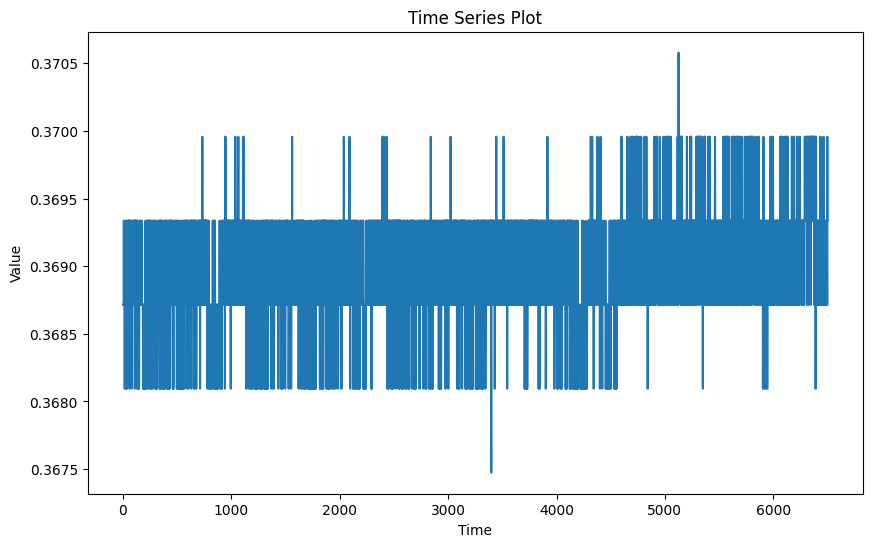

In [ ]:
skip_data = []
steps = 1000
skip = 1

for i in range(steps):
    skip_data.append(PIT300[i * skip])
    
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting skip_data as a time series
ax.plot(range(len(skip_data)), skip_data)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Time Series Plot')
plt.show()